In [144]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [145]:
# TODO:
# 1. Load the cancer dataset
# 2. Perform PCA
# 3. Train a linear SVM using the first two principal components
# 4. Plot the decision boundary

In [146]:
# Function to load and prepare the cancer dataset
def load_and_prepare_data():
    # Load the breast cancer dataset from sklearn.datasets
    # Extract the data (features) and target labels
    # Standardize the features using StandardScaler
    bcDataset = load_breast_cancer()
    features = bcDataset.data
    target = bcDataset.target

    standardScaler = StandardScaler()
    scaledData = standardScaler.fit_transform(features)

    return target, scaledData

    pass

In [147]:
# Function to perform PCA on the cancer dataset
def perform_pca(data):
    # Initialize a PCA object
    # Fit the PCA on the standardized data
    # Transform the data onto the principal components
    pca = PCA()
    pca_data = pca.fit_transform(data)

    return pca, pca_data

    pass


In [148]:
# Function to plot the results of PCA
def plot_pca_results(pca, pca_data, target):
    # Create a scatter plot of the first three principal components
    # Color code points based on the target labels
    # Optionally, create additional plots as necessary (e.g., scree plot to show explained variance)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    scatter = ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=target, cmap='viridis', edgecolor='k', alpha=0.7)

    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title('3D PCA - Breast Cancer Dataset')
    
    cbar = plt.colorbar(scatter)
    cbar.set_label('Target Labels')

    plt.show()

    pass


In [149]:
#scree plot
def screePlot(pca):
    singularValues = pca.singular_values_
    
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(singularValues) + 1), singularValues, marker='o', linestyle='--', color='r')
    
    plt.xlabel('Principal Component')
    plt.ylabel('Singular Values')
    plt.title('Scree Plot - Singular Values of Principal Components')
    
    plt.show()

    pass

In [150]:
#cumulative variance
def cumulativeVariancePlot(pca):
    singularValues = pca.singular_values_
    
    cumulativeVariance = np.cumsum(singularValues) / np.sum(singularValues)
    
    plt.figure(figsize=(8, 6))
    plt.plot(cumulativeVariance, marker='o', color='b', linestyle='--')
    plt.xlabel('k Principal Components')
    plt.ylabel('Cumulative Variance')
    plt.title('Cumulative Variance by Principal Components')
    
    plt.show()

    pass

In [151]:
#explained variance
def explainedVariancePlot(pca):
    singularValues = pca.singular_values_
    sumx = 0
    varianceExplained = []

    for a in range(len(singularValues)):
        sumx = sumx + singularValues[a]
    
    for a in range(len(singularValues)):
        varianceExplained.append(singularValues[a]/sumx)

    plt.figure(figsize=(8, 6))
    plt.plot(varianceExplained, marker='o', color='b', linestyle='--')
    plt.xlabel('Principal Components')
    plt.ylabel('Principal Component Variance')
    plt.title('Variance explained by each principal component')

    plt.show()

    pass

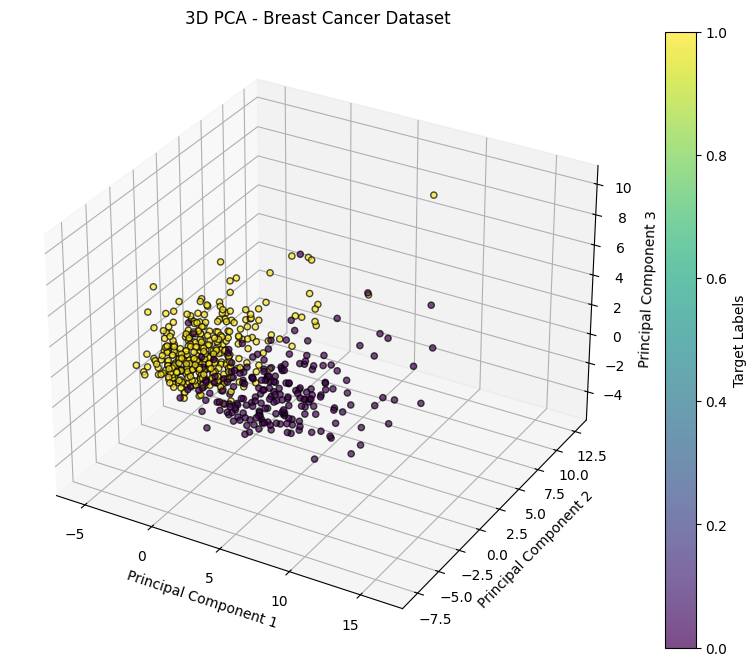

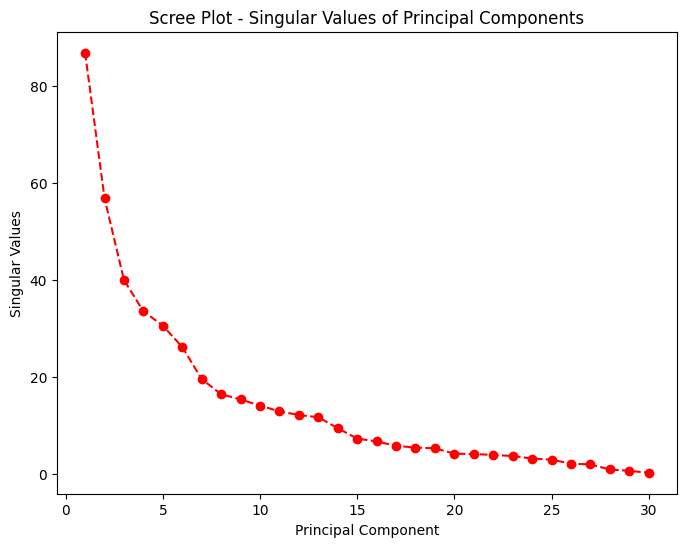

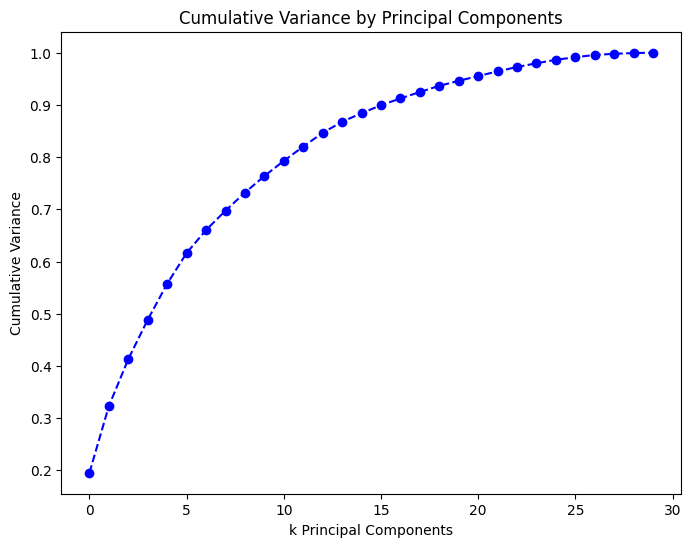

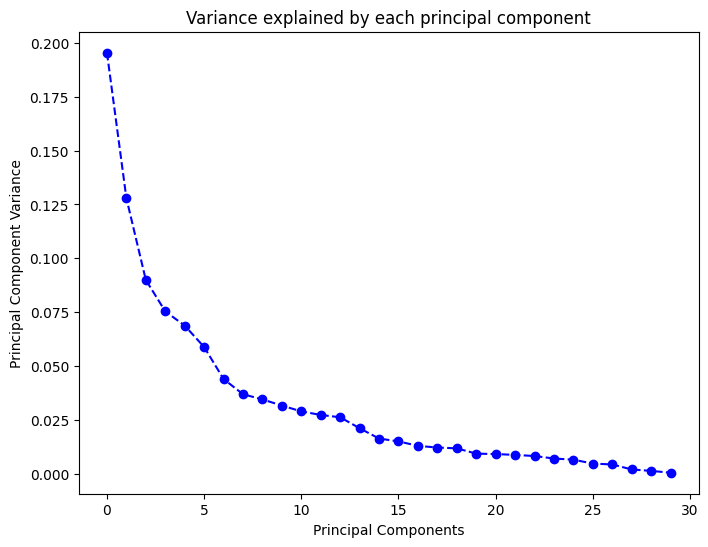

In [152]:
if __name__ == "__main__":
    #call functions here
    #load scaled data and target
    bcTarget, bcScaledData = load_and_prepare_data()

    #perform PCA
    pca, pca_data = perform_pca(bcScaledData)

    #plot PCA
    plot_pca_results(pca, pca_data, bcTarget)

    #plot scree
    screePlot(pca)

    #plot cumulative variance
    cumulativeVariancePlot(pca)

    #plot explained variance
    explainedVariancePlot(pca)

    pass

b) 
3-component:
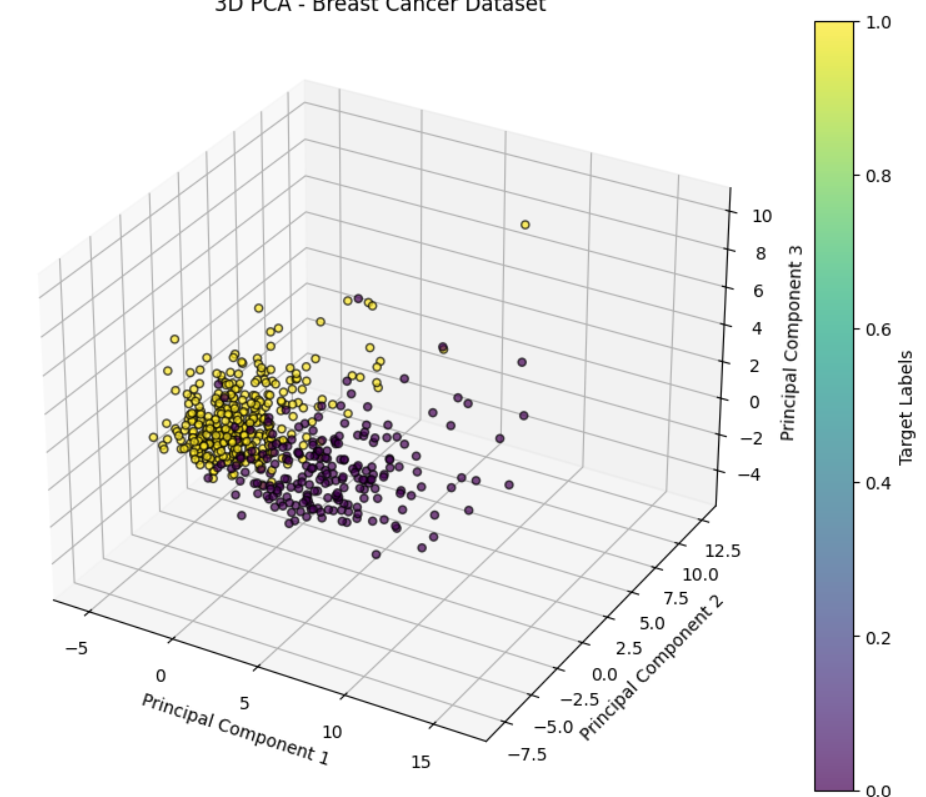

2-component:
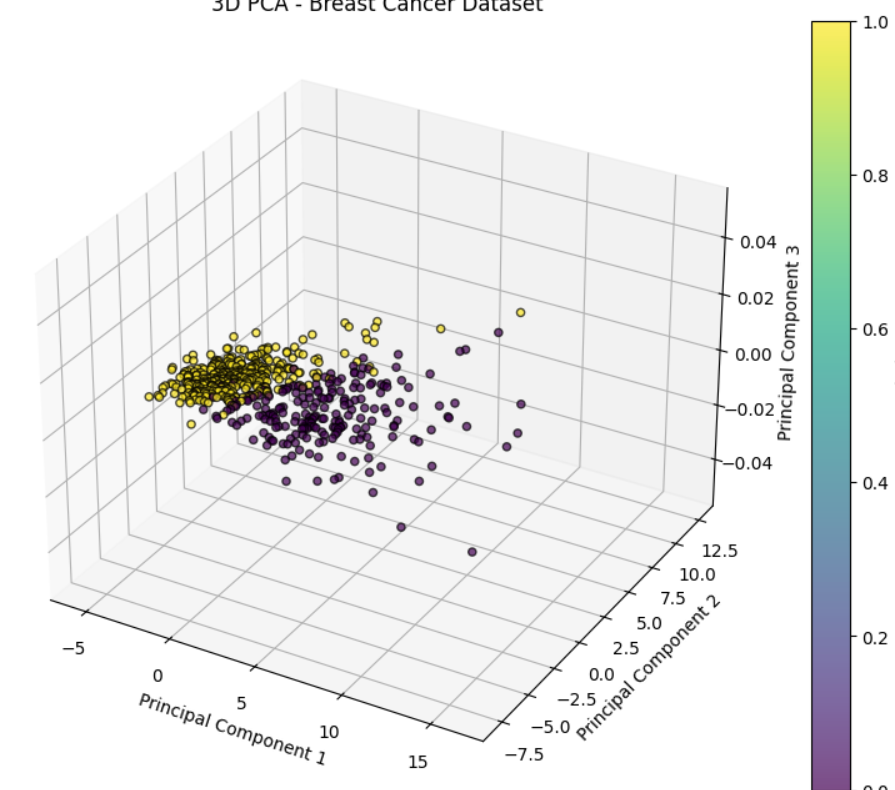

As you can see, keeping three principal components does do a better job at seperating the data compared to keeping just 2 components. The difference isn't vast though, since the data still looks cluttered with the 3 principal components. All groups in the plot (yellow, dark purple, and light purple) are not as cluttered in the centre with the 3-component as compared to the 2-component.

d) I would say it's best to keep 6 principal components since all other components past number 6 have much less impact on the PCA output. This is because the size of the principal components past number 6 are much smaller when compared to the size of the first 6 principal components.


g) I believe the best number of principal components to keep from the plots in part e) and f) would be 15. It's a big jump from the previous number of 6 principal components but this is because of two reasons. We know numbers past 6 components have less impact on the matrix, but the most negligible amount of impact is past number 15. Also with 15 components, as shown in the cumulative variance graph, we would have close to 90% accuracy for the matrix. Principal components past 15, all the way to 30, have a very miniscule impact on matrix accuracy. Also as shown on the principal component variance plot, the variance becomes mostly negligible past 13 components. Overall I think 15 components is the 'best' number of components to keep since it maintains a good accuracy for the matrix whilst still having some impact on the variance.